In [1]:
# import tensorflow
import tensorflow as tf
print(tf.__version__)

2.17.1


In [2]:
#load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255, x_test / 255 # standardise the data
print ("x_train.shape:",x_train.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train.shape: (60000, 28, 28)


In [3]:
# build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # first flatten the data
    tf.keras.layers.Dense(128,  activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax') # 10 digits so 10 output layers
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# train the model
r = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8593 - loss: 0.4799 - val_accuracy: 0.9611 - val_loss: 0.1310
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9556 - loss: 0.1516 - val_accuracy: 0.9673 - val_loss: 0.1024
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9667 - loss: 0.1093 - val_accuracy: 0.9765 - val_loss: 0.0796
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9753 - loss: 0.0832 - val_accuracy: 0.9747 - val_loss: 0.0793
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9763 - loss: 0.0734 - val_accuracy: 0.9781 - val_loss: 0.0699
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9805 - loss: 0.0615 - val_accuracy: 0.9776 - val_loss: 0.0716
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9833 - loss: 0.0526 - val_accuracy: 0.9776 - val_loss: 0.0728
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9846 - loss: 0.0476

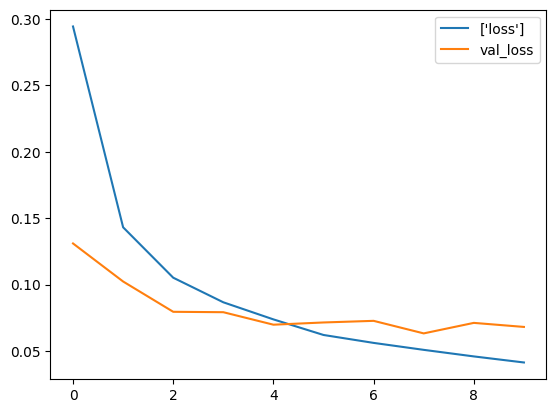

In [6]:
# plot the loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label=['loss'])
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

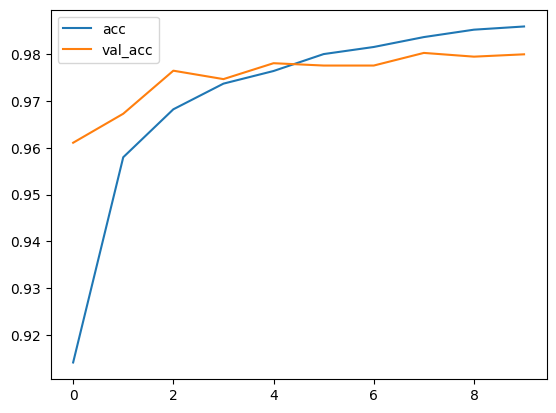

In [7]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [8]:
# evaluate the model
print(model.evaluate(x_test, y_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9769 - loss: 0.0825
[0.06818995624780655, 0.9800000190734863]


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion matrix without normailsation
[[ 974    0    0    0    0    1    1    1    3    0]
 [   0 1125    3    1    0    0    2    0    4    0]
 [   6    2 1006    2    2    0    2    7    5    0]
 [   1    0    3  994    0    4    0    3    1    4]
 [   1    1    1    1  957    0    5    4    2   10]
 [   2    0    0    8    1  868    2    2    7    2]
 [   7    2    1    1    2    1  944    0    0    0]
 [   1    6   11    1    0    0    0 1004    1    4]
 [   4    0    3    3    3    2    2    2  951    4]
 [   4    3    0    8    7    1    0    6    3  977]]


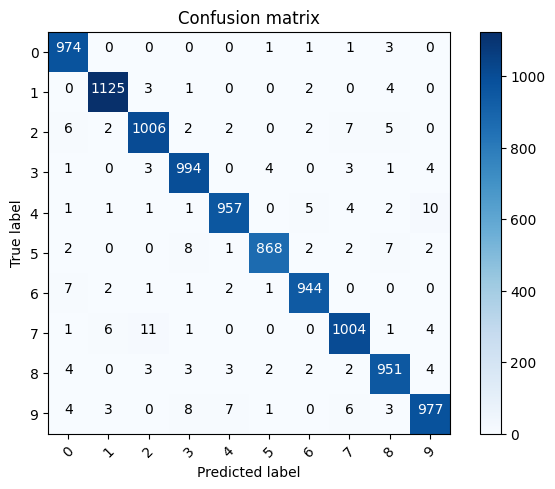

In [11]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion maeix
  """

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[: , np.newaxis]
    print("Normalised confusion matrix")
  else:
    print("Confusion matrix without normailsation")

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


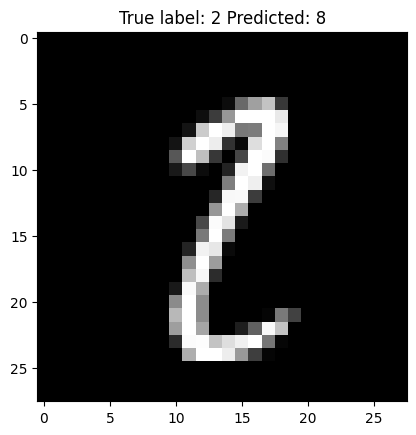

In [14]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));